In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
import cesium
from cesium import featurize

In [ ]:
print(cesium.__version__)

In [ ]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [80]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [ ]:
test_new.head()

In [ ]:
# It will print the type of value of each column
long_time = test_new.correct_longtime
print(type(long_time))
string_time = test_new.stringTime
print(type(string_time))

In [ ]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [ ]:
print(test_new.shape)  #ROWS, COLUMNS

In [ ]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [ ]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

#RWDAKRWRS8V0
# 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

In [ ]:
size_column = len(multivariate_column_label)
print(size_column)

In [ ]:
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [ ]:
multivariate_data.head()

In [ ]:
multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [ ]:
# checking column type
s = multivariate_data['dateTime_column'].dtype
print(s)

In [ ]:
multivariate_data.head()

In [ ]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [ ]:
tr.head()

In [ ]:
tr['Date'] = multivariate_data['dateTime_column'].dt.strftime('%d/%m/%Y')
tr['Time'] = multivariate_data['dateTime_column'].dt.strftime('%H:%M:%S')

In [ ]:
e1 = tr['Date'].dtype
print(type(e1))

In [ ]:
# v = pd.to_datetime(multivariate_data['dateTime_column'], errors='coerce')

# tr['Time_1'] = v.dt.time
# tr['Date_1'] = v.dt.floor('D')

In [ ]:
# it will return a column with weekday name
tr['Weekday_name'] = tr.index.weekday_name

In [ ]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [ ]:
tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [ ]:
# tr['new'] = multivariate_data.apply(lambda row: row.name, axis=1)
# tr = tr.drop(['new'], axis=1)

In [ ]:
e = 'weekend'
print(type(e))
for index_1, value_1 in tr.iterrows():
    for i_1 , v_1 in enumerate(value_1):
        if i_1 == 13 and v_1 == e:
            d = tr.index.get_loc(index_1) #It will give the row value for the corresponding index of the dataframe
#             print(tr.iloc[d]['Weekday_name'])
            print(index_1)

In [ ]:
# make all the time(without date) to numeric value
tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [103]:
tr["shift of day"] = ""

In [104]:
tr.head()

,dateTime_column,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,Date,Time,Weekday_name,weekday,TypeofDAY,TypeofDAY_number,numric_time,shift of day
dateTime,,,,,,,,,,,,,,,,,
2019-04-01 10:41:00,2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755,01/04/2019,10:41:00,Monday,0,Weekday,1,38460.0,
2019-04-01 10:42:00,2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548,01/04/2019,10:42:00,Monday,0,Weekday,1,38520.0,
2019-04-01 10:43:00,2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477,01/04/2019,10:43:00,Monday,0,Weekday,1,38580.0,
2019-04-01 10:44:00,2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633,01/04/2019,10:44:00,Monday,0,Weekday,1,38640.0,
2019-04-01 10:45:00,2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026,01/04/2019,10:45:00,Monday,0,Weekday,1,38700.0,


In [107]:
# print(tr['Time'][7000:7060])
# tr.between_time('10:00', '10:01')
# for i in range(len(tr)):
# tr['shift_of_day'] = np.where(tr.between_time('06:00', '14:00'), 'morning_shift','no shift')

for i, row in tr.iterrows():
    if tr.between_time('06:00', '14:00'):
        ifor_val = 'morning_shift'
        tr.at[i,'shift of day'] = ifor_val
    else:
        ifor_val = 'no shift'
        tr.at[i,'shift of day'] = ifor_val

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [120]:
morning_shift = tr.between_time('06:00', '14:00')
day_shift = tr.between_time('14:01', '22:00')
night_shift = tr.between_time('22:01', '05:59')

print(len(morning_shift))
print(len(day_shift))
print(len(night_shift))

night_shift.head()

2793
2812
2395


,dateTime_column,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,Date,Time,Weekday_name,weekday,TypeofDAY,TypeofDAY_number,numric_time,shift of day
dateTime,,,,,,,,,,,,,,,,,
2019-04-01 22:01:00,2019-04-01 22:01:00,100.0,97.442167,97.620466,39.906476,70.415305,95.425458,96.344042,75.974896,01/04/2019,22:01:00,Monday,0,Weekday,1,79260.0,
2019-04-01 22:02:00,2019-04-01 22:02:00,100.0,97.327288,97.508984,40.123380,70.714459,95.370280,96.283951,75.605889,01/04/2019,22:02:00,Monday,0,Weekday,1,79320.0,
2019-04-01 22:03:00,2019-04-01 22:03:00,100.0,97.325764,97.502980,40.084819,70.892408,95.339089,96.295169,76.179690,01/04/2019,22:03:00,Monday,0,Weekday,1,79380.0,
2019-04-01 22:04:00,2019-04-01 22:04:00,100.0,97.469130,97.661156,39.976367,70.556536,95.243924,96.268733,76.501195,01/04/2019,22:04:00,Monday,0,Weekday,1,79440.0,
2019-04-01 22:05:00,2019-04-01 22:05:00,100.0,97.533384,97.724046,39.679916,70.351879,95.172746,96.179799,76.533912,01/04/2019,22:05:00,Monday,0,Weekday,1,79500.0,


2793


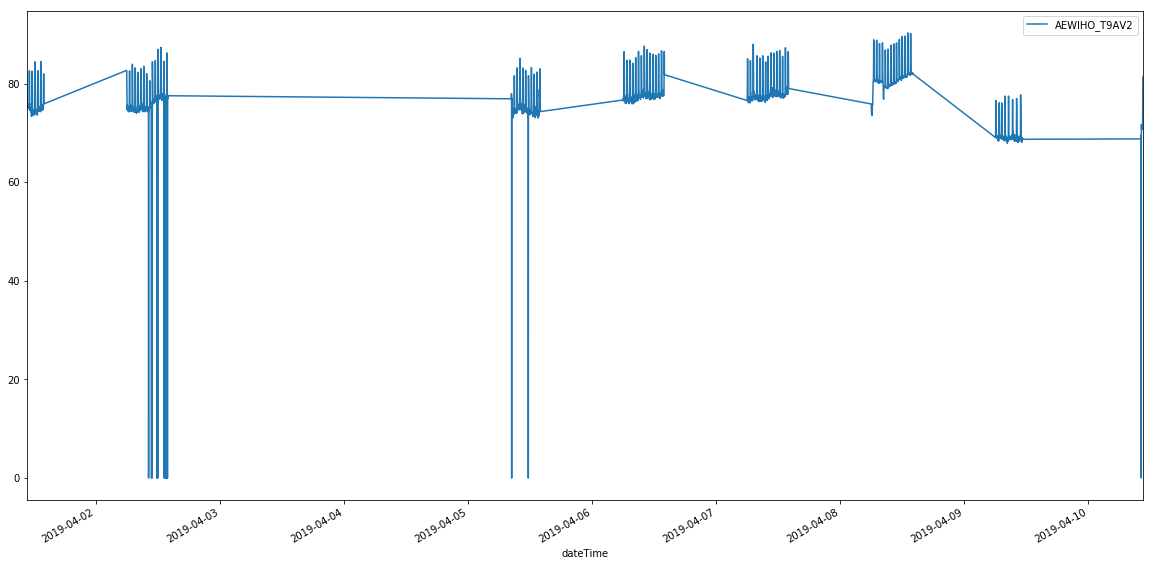

In [117]:
print(len(morning_shift))
morning_shift.plot(y='AEWIHO_T9AV2')
plt.rcParams['figure.figsize'] =(20,10)

In [ ]:
# test_purpose = test_new.iloc[2000:2010][multivariate_column_label]
# test_purpose = test_purpose.loc[::-1]
# test_purpose.head()

In [ ]:
# test_purpose_array = test_purpose.values
# print(test_purpose_array.shape)
# one_element = test_purpose_array[:,-1]
# one_element = np.reshape(one_element,(-1,1))
# print(one_element.shape)

# cesium.features.graphs.amplitude(one_element)

In [ ]:
# group = one_element

In [ ]:
# def get_feature(group):
#     return {
#             "amplitude": cesium.features.graphs.amplitude(group),
#             "maximum": cesium.features.graphs.maximum(group),
#             "median": cesium.features.graphs.median(group),
#             "minimum": cesium.features.graphs.minimum(group),
#             "std": cesium.features.graphs.std(group),
#             "mean": group.mean(),
#             "median_absolute_deviation": cesium.features.graphs.median_absolute_deviation(group),
#             "percent_close_to_median": cesium.features.graphs.percent_close_to_median(group),
#             "skew": cesium.features.graphs.skew(group),
#             "stetson_j": cesium.features.graphs.stetson_j(group),
#             "stetson_k": cesium.features.graphs.stetson_k(group),
# #             "peaks_count": detect_peaks(group, mph= 10000, mpd=20).size
#            }

# feature = get_feature(group)
# print(feature)

In [ ]:
# def feature_group(rrx, freq = '300s'):
#     dfx = pd.DataFrame()

#     dfx = rrx.groupby(pd.Grouper(freq=freq)).mean() #["mrri"]
#     dfx["mhr"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: cesium.features.graphs.amplitude(x)["amplitude"])
#     dfx["nn50"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: time_domain(x)["nn50"])
#     dfx["rmssd"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: time_domain(x)["rmssd"])
#     dfx["sdnn"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: time_domain(x)["sdnn"])

#     dfx["hf"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["hf"])
#     dfx["hfnu"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["hfnu"])
#     dfx["lf"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["lf"])
#     dfx["lf_hf"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["lf_hf"])
#     dfx["lfnu"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["lfnu"])
#     dfx["total_power"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["total_power"])
#     dfx["vlf"] = rrx.groupby(pd.Grouper(freq=freq)).aggregate(lambda x: frequency_domain(x)["vlf"])


#     return dfx.round(2)

In [ ]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

In [ ]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

In [ ]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [ ]:
print(multivariate_data.shape)
print(multivariate_data_modify.shape)

In [ ]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [ ]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [ ]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

In [ ]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [ ]:
print(multivariate_data_drop_zero_interpolate.shape)

In [ ]:
multivariate_data_drop_zero_interpolate.head()

In [ ]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [ ]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


In [ ]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

In [ ]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [ ]:
ex = new_dataframe.plot(subplots=True, layout=(size_column-1,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

In [ ]:
multivariate_data_drop_zero.head()

In [ ]:
new_dataframe.corr()

In [ ]:
new_dataframe_1 = new_dataframe.drop(['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [ ]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
dataset=np.array(new_dataframe_1)

In [ ]:
new_dataframe_1.head()

In [ ]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.9)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

# Linear Regression

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
train_model=LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
print(train_model)

In [ ]:
predicted_output=train_model.predict(test_input)

In [ ]:
print('test_input size: ',test_input.size)
print('test_output size: ',test_output.size)
print('predicted output size: ',predicted_output.size)

print('test_input shape: ',test_input.shape)
print('test_output shape: ',test_output.shape)
print('predicted output shape: ',predicted_output.shape)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [ ]:
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot(predicted_output[0:15], color = 'blue')
plt.plot(test_output[0:15], color = 'red')

In [ ]:
actual_data = range(65)

plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

In [ ]:
plt.hist(difference_of_value, bins=15)
# plt.xlim(-10,10,1)
plt.show()

In [ ]:
print(test_output.shape)
print(predicted_output.shape)

test_output_mean = np.mean(test_output)
print(test_output_mean)

length_predicted_output = len(predicted_output)
print(length_predicted_output)

m = 0

for i in predicted_output:
    n = i - test_output_mean
    n = n**2
    m = n+m
variance_pred_wrt_test = m / length_predicted_output


std_pred_wrt_test = math.sqrt(variance_pred_wrt_test)

print(std_pred_wrt_test)

In [ ]:
low = 0
high = len(predicted_output)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))

plt.plot(test_output[low:high], predicted_output[low:high], 'bo')
# plt.plot(predicted_output[low:high],test_output[low:high], 'bo')

plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')

plt.show()

In [ ]:
# graph actual vs error

low_1 = 0
high_1 = len(test_output)

plt.plot(test_output[low:high], difference_of_value[low:high], 'bo')

In [ ]:
plt.scatter(range(0, len(test_output)),test_output)
plt.show()
plt.scatter(range(0, len(predicted_output)),predicted_output)
plt.show()

In [ ]:
low = 100
high = 500

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(test_output[low:high]-1), max(test_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual value graph')

plt.show()

In [ ]:
low = 0
high = 500

print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(predicted_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted value graph')

plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot(predicted_output)
plt.plot(test_output)
plt.show()

# polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
model = model.fit(train_input, train_output)

In [ ]:
predicted_output_polynomial = model.predict(test_input)

In [ ]:
%matplotlib qt

actual_data = range(65)


plt.plot(predicted_output_polynomial[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted output','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [ ]:
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_polynomial))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_polynomial))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_polynomial))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_polynomial))
print('RMSE: ',RMSE)

In [ ]:
val = []
val = np.array(val)
for i in range (0,len(test_output)):
    val_1 = predicted_output[i] - test_output[i]
#     print(val)
    val = np.append(val, val_1)
    i+=1

In [ ]:
val.shape

In [ ]:
plt.plot(val)
plt.show()

In [ ]:
# plt.plot(difference_of_value)
# plt.show()

In [ ]:
# new_val = difference_of_value - val

In [ ]:
# new_val.shape

In [ ]:
# plt.plot(new_val)
# plt.show()

In [ ]:
from sklearn import linear_model
x = [1,2,3,4,5]
x=np.array(x)
y = [2,4,5,4,5]
y=np.array(y)


x_1 = np.reshape(x, (-1, 1))
y_1 = np.reshape(y, (-1, 1))

In [ ]:
y_1

In [ ]:
# my_reg = linear_model.LinearRegression(fit_intercept=True, normalize=False)
my_reg = LinearRegression(fit_intercept=True, normalize=False)

my_reg.fit(x_1,y_1)

In [ ]:
my_reg

In [ ]:
print('Slope:' ,my_reg.coef_)
print('Intercept:', my_reg.intercept_)

In [ ]:
pred_y = my_reg.predict(x_1)

In [ ]:
plt.scatter(x_1, y_1)
plt.plot(x_1,pred_y, color='red')
plt.show()

In [ ]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [ ]:
# clf.fit(train_input, train_output)
clf.fit(x_1, y_1)

In [ ]:
print('Slope:' ,clf.coef_)
print('Intercept:', clf.intercept_)

In [ ]:
pred_y_SGD = clf.predict(test_input)

In [ ]:
plt.plot(test_output, color = 'black')
plt.plot(pred_y_SGD, color='red')
plt.show()

In [ ]:
pred_y_SGD_reshape = np.reshape(pred_y_SGD, (-1, 1))
test_output_reshape = np.reshape(test_output, (-1, 1))
print(pred_y_SGD_reshape.shape)
print(test_output_reshape.shape)
print(test_input.shape)

In [ ]:
clf.score(test_output_reshape, pred_y_SGD_reshape)

In [ ]:
test_input